# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:10<00:00, 5.71KFile/s] 


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

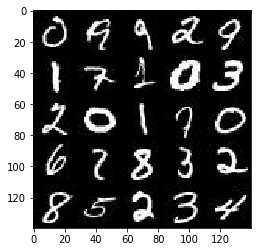

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

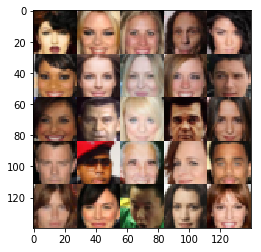

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32,(None,image_width, image_height, 
                                             image_channels),name='real_inputs')
    z_inputs = tf.placeholder(tf.float32,(None,z_dim),name='z_inputs')
    lr = tf.placeholder(tf.float32,name='lr')

    return real_inputs, z_inputs, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
       
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        
        out = tf.tanh(logits)
        
  
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)
    
    saver = tf.train.Saver()
    
    steps = 0
    total_steps = epoch_count * batch_size
    losses = []
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    # show samples
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
    return losses
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


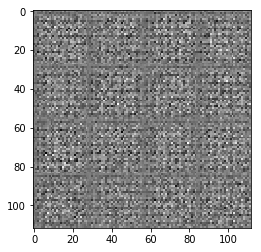

Epoch 1/2... Discriminator Loss: 1.2329... Generator Loss: 0.8111
Epoch 1/2... Discriminator Loss: 0.4280... Generator Loss: 3.4102
Epoch 1/2... Discriminator Loss: 0.4496... Generator Loss: 2.7146
Epoch 1/2... Discriminator Loss: 1.2991... Generator Loss: 0.9055
Epoch 1/2... Discriminator Loss: 4.5106... Generator Loss: 0.0443
Epoch 1/2... Discriminator Loss: 1.1402... Generator Loss: 1.0425
Epoch 1/2... Discriminator Loss: 1.2300... Generator Loss: 1.8835
Epoch 1/2... Discriminator Loss: 1.3417... Generator Loss: 1.3972
Epoch 1/2... Discriminator Loss: 1.2005... Generator Loss: 2.1092
Epoch 1/2... Discriminator Loss: 1.1106... Generator Loss: 1.6088


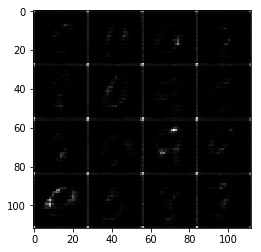

Epoch 1/2... Discriminator Loss: 1.2603... Generator Loss: 1.5823
Epoch 1/2... Discriminator Loss: 1.7325... Generator Loss: 0.3537
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 1.3599
Epoch 1/2... Discriminator Loss: 1.3793... Generator Loss: 0.5930
Epoch 1/2... Discriminator Loss: 1.4425... Generator Loss: 0.5267
Epoch 1/2... Discriminator Loss: 1.5015... Generator Loss: 0.5051
Epoch 1/2... Discriminator Loss: 1.1200... Generator Loss: 0.9507
Epoch 1/2... Discriminator Loss: 0.9670... Generator Loss: 1.6089
Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 2.2311
Epoch 1/2... Discriminator Loss: 1.3609... Generator Loss: 0.4954


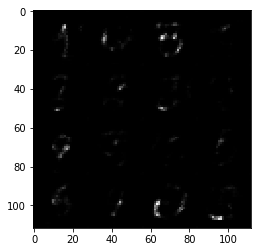

Epoch 1/2... Discriminator Loss: 1.0326... Generator Loss: 2.2515
Epoch 1/2... Discriminator Loss: 0.9963... Generator Loss: 1.8971
Epoch 1/2... Discriminator Loss: 0.9422... Generator Loss: 2.1023
Epoch 1/2... Discriminator Loss: 0.8829... Generator Loss: 1.5522
Epoch 1/2... Discriminator Loss: 1.0358... Generator Loss: 0.9208
Epoch 1/2... Discriminator Loss: 1.3583... Generator Loss: 2.7795
Epoch 1/2... Discriminator Loss: 1.5195... Generator Loss: 0.5248
Epoch 1/2... Discriminator Loss: 1.3991... Generator Loss: 0.5465
Epoch 1/2... Discriminator Loss: 1.1451... Generator Loss: 1.6581
Epoch 1/2... Discriminator Loss: 1.2736... Generator Loss: 1.3756


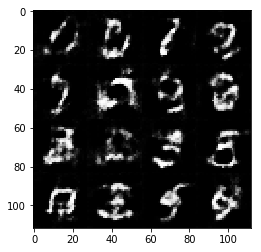

Epoch 1/2... Discriminator Loss: 1.1699... Generator Loss: 0.8035
Epoch 1/2... Discriminator Loss: 1.2590... Generator Loss: 0.6659
Epoch 1/2... Discriminator Loss: 1.6364... Generator Loss: 0.3772
Epoch 1/2... Discriminator Loss: 1.2013... Generator Loss: 0.8185
Epoch 1/2... Discriminator Loss: 1.0442... Generator Loss: 1.1038
Epoch 1/2... Discriminator Loss: 1.3021... Generator Loss: 0.5812
Epoch 1/2... Discriminator Loss: 1.3005... Generator Loss: 0.5943
Epoch 1/2... Discriminator Loss: 1.0861... Generator Loss: 1.1385
Epoch 1/2... Discriminator Loss: 1.0807... Generator Loss: 1.2825
Epoch 1/2... Discriminator Loss: 1.1253... Generator Loss: 1.6195


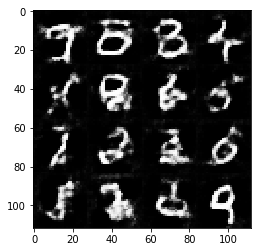

Epoch 1/2... Discriminator Loss: 1.0809... Generator Loss: 1.3593
Epoch 1/2... Discriminator Loss: 1.0848... Generator Loss: 0.9475
Epoch 1/2... Discriminator Loss: 0.9907... Generator Loss: 1.2622
Epoch 1/2... Discriminator Loss: 1.1136... Generator Loss: 0.9079
Epoch 1/2... Discriminator Loss: 1.1181... Generator Loss: 0.9108
Epoch 1/2... Discriminator Loss: 1.3706... Generator Loss: 1.7166
Epoch 1/2... Discriminator Loss: 1.1313... Generator Loss: 0.9896
Epoch 1/2... Discriminator Loss: 1.0806... Generator Loss: 0.9060
Epoch 1/2... Discriminator Loss: 1.1502... Generator Loss: 1.0469
Epoch 1/2... Discriminator Loss: 1.0333... Generator Loss: 0.9697


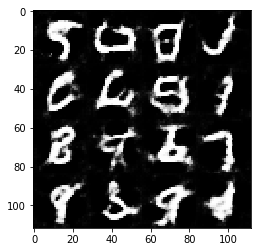

Epoch 1/2... Discriminator Loss: 1.1290... Generator Loss: 0.7723
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 1.6037
Epoch 1/2... Discriminator Loss: 1.1275... Generator Loss: 0.8809
Epoch 1/2... Discriminator Loss: 1.1323... Generator Loss: 1.6332
Epoch 1/2... Discriminator Loss: 1.2809... Generator Loss: 1.8208
Epoch 1/2... Discriminator Loss: 1.4578... Generator Loss: 0.4970
Epoch 1/2... Discriminator Loss: 1.2752... Generator Loss: 2.0804
Epoch 1/2... Discriminator Loss: 1.1192... Generator Loss: 0.7513
Epoch 1/2... Discriminator Loss: 1.1859... Generator Loss: 0.9584
Epoch 1/2... Discriminator Loss: 1.0086... Generator Loss: 1.0662


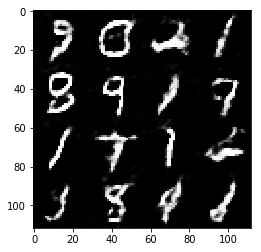

Epoch 1/2... Discriminator Loss: 1.0328... Generator Loss: 0.9723
Epoch 1/2... Discriminator Loss: 1.2023... Generator Loss: 0.6597
Epoch 1/2... Discriminator Loss: 1.1675... Generator Loss: 1.9307
Epoch 1/2... Discriminator Loss: 1.3112... Generator Loss: 1.7611
Epoch 1/2... Discriminator Loss: 1.3865... Generator Loss: 0.5303
Epoch 1/2... Discriminator Loss: 1.3549... Generator Loss: 1.9407
Epoch 1/2... Discriminator Loss: 0.9868... Generator Loss: 1.7267
Epoch 1/2... Discriminator Loss: 1.2261... Generator Loss: 0.6793
Epoch 1/2... Discriminator Loss: 1.1135... Generator Loss: 1.8619
Epoch 1/2... Discriminator Loss: 1.0573... Generator Loss: 1.0935


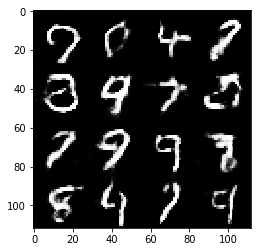

Epoch 1/2... Discriminator Loss: 1.0928... Generator Loss: 1.4975
Epoch 1/2... Discriminator Loss: 1.4875... Generator Loss: 2.2434
Epoch 1/2... Discriminator Loss: 1.1455... Generator Loss: 0.7755
Epoch 1/2... Discriminator Loss: 1.1294... Generator Loss: 0.8981
Epoch 1/2... Discriminator Loss: 1.0219... Generator Loss: 1.5521
Epoch 1/2... Discriminator Loss: 1.4368... Generator Loss: 0.5360
Epoch 1/2... Discriminator Loss: 0.9051... Generator Loss: 1.2967
Epoch 1/2... Discriminator Loss: 1.0212... Generator Loss: 1.1519
Epoch 1/2... Discriminator Loss: 1.3252... Generator Loss: 1.6282
Epoch 1/2... Discriminator Loss: 1.2755... Generator Loss: 0.5797


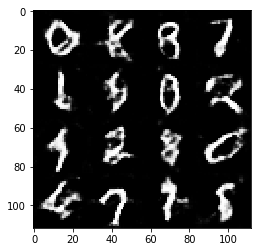

Epoch 1/2... Discriminator Loss: 1.0306... Generator Loss: 1.3578
Epoch 1/2... Discriminator Loss: 1.0625... Generator Loss: 1.7871
Epoch 1/2... Discriminator Loss: 0.9516... Generator Loss: 1.5297
Epoch 1/2... Discriminator Loss: 1.1702... Generator Loss: 1.1295
Epoch 1/2... Discriminator Loss: 1.0812... Generator Loss: 0.9160
Epoch 1/2... Discriminator Loss: 1.1451... Generator Loss: 0.7426
Epoch 1/2... Discriminator Loss: 1.0926... Generator Loss: 1.4250
Epoch 1/2... Discriminator Loss: 0.8717... Generator Loss: 1.2415
Epoch 1/2... Discriminator Loss: 1.1791... Generator Loss: 0.6859
Epoch 1/2... Discriminator Loss: 1.2259... Generator Loss: 2.0216


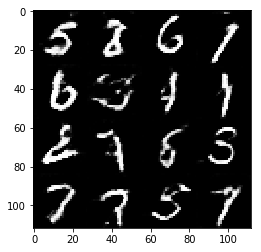

Epoch 1/2... Discriminator Loss: 1.2414... Generator Loss: 0.7755
Epoch 1/2... Discriminator Loss: 1.0411... Generator Loss: 0.9056
Epoch 1/2... Discriminator Loss: 1.0014... Generator Loss: 1.3594
Epoch 2/2... Discriminator Loss: 1.0276... Generator Loss: 0.8531
Epoch 2/2... Discriminator Loss: 1.0416... Generator Loss: 1.2152
Epoch 2/2... Discriminator Loss: 1.5645... Generator Loss: 0.4619
Epoch 2/2... Discriminator Loss: 0.9234... Generator Loss: 1.4255
Epoch 2/2... Discriminator Loss: 0.9967... Generator Loss: 0.9430
Epoch 2/2... Discriminator Loss: 1.0046... Generator Loss: 1.4966
Epoch 2/2... Discriminator Loss: 1.0850... Generator Loss: 1.2536


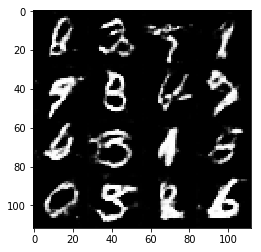

Epoch 2/2... Discriminator Loss: 0.9588... Generator Loss: 0.9413
Epoch 2/2... Discriminator Loss: 1.5749... Generator Loss: 2.8320
Epoch 2/2... Discriminator Loss: 0.9758... Generator Loss: 1.2372
Epoch 2/2... Discriminator Loss: 1.1293... Generator Loss: 0.7500
Epoch 2/2... Discriminator Loss: 1.0126... Generator Loss: 0.8575
Epoch 2/2... Discriminator Loss: 1.3765... Generator Loss: 0.5347
Epoch 2/2... Discriminator Loss: 1.1395... Generator Loss: 0.7779
Epoch 2/2... Discriminator Loss: 1.0553... Generator Loss: 0.9196
Epoch 2/2... Discriminator Loss: 1.6585... Generator Loss: 2.6458
Epoch 2/2... Discriminator Loss: 1.1308... Generator Loss: 0.9151


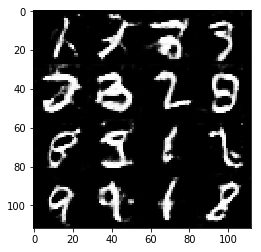

Epoch 2/2... Discriminator Loss: 1.0934... Generator Loss: 0.9051
Epoch 2/2... Discriminator Loss: 1.3244... Generator Loss: 1.5165
Epoch 2/2... Discriminator Loss: 0.9472... Generator Loss: 1.2579
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 0.8505
Epoch 2/2... Discriminator Loss: 0.9548... Generator Loss: 0.9710
Epoch 2/2... Discriminator Loss: 1.0653... Generator Loss: 0.8334
Epoch 2/2... Discriminator Loss: 2.9118... Generator Loss: 4.2746
Epoch 2/2... Discriminator Loss: 1.4334... Generator Loss: 0.5235
Epoch 2/2... Discriminator Loss: 1.2257... Generator Loss: 0.7778
Epoch 2/2... Discriminator Loss: 1.3340... Generator Loss: 0.5694


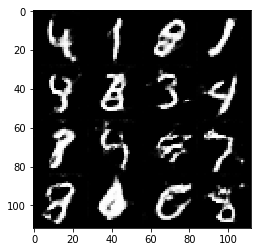

Epoch 2/2... Discriminator Loss: 0.9954... Generator Loss: 1.0703
Epoch 2/2... Discriminator Loss: 1.2538... Generator Loss: 0.6710
Epoch 2/2... Discriminator Loss: 1.0064... Generator Loss: 1.2390
Epoch 2/2... Discriminator Loss: 0.9129... Generator Loss: 1.3281
Epoch 2/2... Discriminator Loss: 1.2288... Generator Loss: 0.6411
Epoch 2/2... Discriminator Loss: 0.9294... Generator Loss: 1.4680
Epoch 2/2... Discriminator Loss: 1.9202... Generator Loss: 3.1992
Epoch 2/2... Discriminator Loss: 1.2371... Generator Loss: 0.7706
Epoch 2/2... Discriminator Loss: 1.2165... Generator Loss: 0.6832
Epoch 2/2... Discriminator Loss: 0.7907... Generator Loss: 1.6604


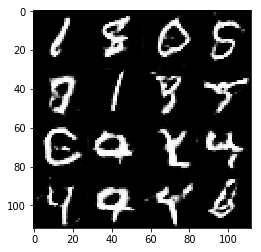

Epoch 2/2... Discriminator Loss: 1.0116... Generator Loss: 2.1630
Epoch 2/2... Discriminator Loss: 0.8441... Generator Loss: 1.2941
Epoch 2/2... Discriminator Loss: 1.1346... Generator Loss: 1.7224
Epoch 2/2... Discriminator Loss: 1.1501... Generator Loss: 0.8396
Epoch 2/2... Discriminator Loss: 0.9900... Generator Loss: 0.9489
Epoch 2/2... Discriminator Loss: 0.9821... Generator Loss: 0.9181
Epoch 2/2... Discriminator Loss: 0.9964... Generator Loss: 1.1067
Epoch 2/2... Discriminator Loss: 0.9130... Generator Loss: 1.0673
Epoch 2/2... Discriminator Loss: 1.1249... Generator Loss: 1.8038
Epoch 2/2... Discriminator Loss: 1.4120... Generator Loss: 0.5203


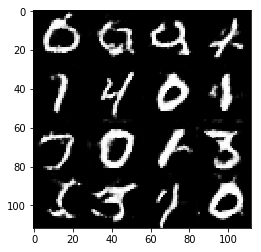

Epoch 2/2... Discriminator Loss: 0.9970... Generator Loss: 0.9702
Epoch 2/2... Discriminator Loss: 1.4313... Generator Loss: 0.4958
Epoch 2/2... Discriminator Loss: 1.0788... Generator Loss: 1.5897
Epoch 2/2... Discriminator Loss: 0.9893... Generator Loss: 1.2819
Epoch 2/2... Discriminator Loss: 0.9868... Generator Loss: 1.7719
Epoch 2/2... Discriminator Loss: 1.1480... Generator Loss: 1.8318
Epoch 2/2... Discriminator Loss: 0.8280... Generator Loss: 1.3297
Epoch 2/2... Discriminator Loss: 1.0560... Generator Loss: 0.8549
Epoch 2/2... Discriminator Loss: 1.1184... Generator Loss: 1.8871
Epoch 2/2... Discriminator Loss: 1.1151... Generator Loss: 0.7978


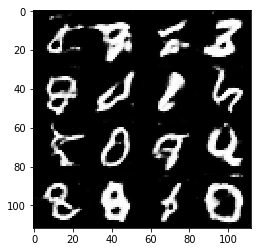

Epoch 2/2... Discriminator Loss: 1.0818... Generator Loss: 1.1730
Epoch 2/2... Discriminator Loss: 1.0106... Generator Loss: 0.9496
Epoch 2/2... Discriminator Loss: 0.9060... Generator Loss: 1.8591
Epoch 2/2... Discriminator Loss: 0.9731... Generator Loss: 2.0536
Epoch 2/2... Discriminator Loss: 1.0583... Generator Loss: 0.8368
Epoch 2/2... Discriminator Loss: 1.0386... Generator Loss: 0.8653
Epoch 2/2... Discriminator Loss: 0.7918... Generator Loss: 1.5134
Epoch 2/2... Discriminator Loss: 1.3560... Generator Loss: 2.7369
Epoch 2/2... Discriminator Loss: 1.5633... Generator Loss: 0.4589
Epoch 2/2... Discriminator Loss: 0.8935... Generator Loss: 1.2518


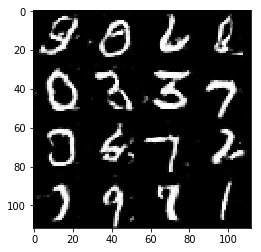

Epoch 2/2... Discriminator Loss: 1.9340... Generator Loss: 0.3206
Epoch 2/2... Discriminator Loss: 1.0369... Generator Loss: 0.9036
Epoch 2/2... Discriminator Loss: 0.8770... Generator Loss: 1.1501
Epoch 2/2... Discriminator Loss: 0.9441... Generator Loss: 1.2560
Epoch 2/2... Discriminator Loss: 1.1245... Generator Loss: 0.7636
Epoch 2/2... Discriminator Loss: 0.8691... Generator Loss: 1.9158
Epoch 2/2... Discriminator Loss: 0.7897... Generator Loss: 1.2224
Epoch 2/2... Discriminator Loss: 1.1514... Generator Loss: 0.7054
Epoch 2/2... Discriminator Loss: 0.8701... Generator Loss: 1.5674
Epoch 2/2... Discriminator Loss: 0.6354... Generator Loss: 1.8563


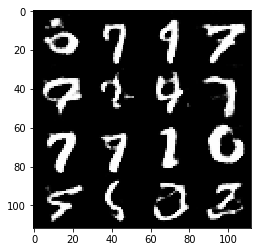

Epoch 2/2... Discriminator Loss: 0.8328... Generator Loss: 1.2344
Epoch 2/2... Discriminator Loss: 1.0060... Generator Loss: 0.8984
Epoch 2/2... Discriminator Loss: 1.1155... Generator Loss: 0.7027
Epoch 2/2... Discriminator Loss: 1.5028... Generator Loss: 2.7786
Epoch 2/2... Discriminator Loss: 0.8425... Generator Loss: 1.1539
Epoch 2/2... Discriminator Loss: 1.4070... Generator Loss: 2.3607
Epoch 2/2... Discriminator Loss: 0.8960... Generator Loss: 1.0332
Epoch 2/2... Discriminator Loss: 0.7370... Generator Loss: 1.6779
Epoch 2/2... Discriminator Loss: 2.0207... Generator Loss: 3.9454
Epoch 2/2... Discriminator Loss: 0.9024... Generator Loss: 1.2348


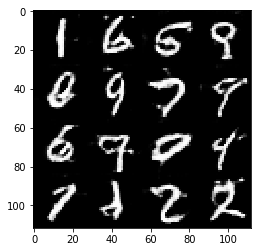

Epoch 2/2... Discriminator Loss: 0.8786... Generator Loss: 1.3727
Epoch 2/2... Discriminator Loss: 0.7551... Generator Loss: 1.3392
Epoch 2/2... Discriminator Loss: 2.1920... Generator Loss: 0.2610
Epoch 2/2... Discriminator Loss: 0.8477... Generator Loss: 1.2918
Epoch 2/2... Discriminator Loss: 0.9847... Generator Loss: 0.9543
Epoch 2/2... Discriminator Loss: 1.0707... Generator Loss: 1.0276
Epoch 2/2... Discriminator Loss: 1.0624... Generator Loss: 1.0343


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


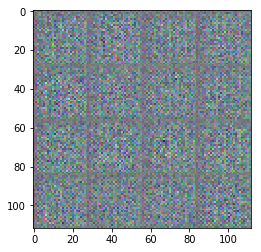

Epoch 1/1... Discriminator Loss: 1.5167... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.0810... Generator Loss: 0.9030
Epoch 1/1... Discriminator Loss: 0.6673... Generator Loss: 1.8585
Epoch 1/1... Discriminator Loss: 0.5920... Generator Loss: 2.0863
Epoch 1/1... Discriminator Loss: 0.6989... Generator Loss: 1.7018
Epoch 1/1... Discriminator Loss: 1.3131... Generator Loss: 0.6003
Epoch 1/1... Discriminator Loss: 0.6825... Generator Loss: 3.0435
Epoch 1/1... Discriminator Loss: 0.6794... Generator Loss: 1.9435
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.6086
Epoch 1/1... Discriminator Loss: 0.7828... Generator Loss: 1.2592


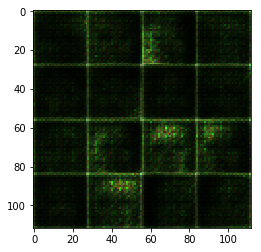

Epoch 1/1... Discriminator Loss: 0.5829... Generator Loss: 2.1007
Epoch 1/1... Discriminator Loss: 1.2164... Generator Loss: 3.3128
Epoch 1/1... Discriminator Loss: 1.0909... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.7453
Epoch 1/1... Discriminator Loss: 0.7948... Generator Loss: 2.6875
Epoch 1/1... Discriminator Loss: 0.8953... Generator Loss: 1.7386
Epoch 1/1... Discriminator Loss: 0.9172... Generator Loss: 1.4876
Epoch 1/1... Discriminator Loss: 0.7818... Generator Loss: 1.5375
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 4.6153
Epoch 1/1... Discriminator Loss: 0.8582... Generator Loss: 1.4172


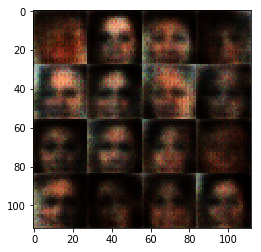

Epoch 1/1... Discriminator Loss: 2.1905... Generator Loss: 0.2205
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.5638
Epoch 1/1... Discriminator Loss: 1.1085... Generator Loss: 0.9281
Epoch 1/1... Discriminator Loss: 0.6841... Generator Loss: 1.5749
Epoch 1/1... Discriminator Loss: 0.7287... Generator Loss: 1.5087
Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.6378
Epoch 1/1... Discriminator Loss: 1.0116... Generator Loss: 2.6311
Epoch 1/1... Discriminator Loss: 0.6661... Generator Loss: 1.6681
Epoch 1/1... Discriminator Loss: 0.8225... Generator Loss: 1.1523
Epoch 1/1... Discriminator Loss: 1.6584... Generator Loss: 0.3902


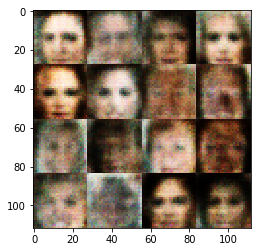

Epoch 1/1... Discriminator Loss: 0.7339... Generator Loss: 3.1445
Epoch 1/1... Discriminator Loss: 0.6349... Generator Loss: 1.6603
Epoch 1/1... Discriminator Loss: 0.8662... Generator Loss: 0.9992
Epoch 1/1... Discriminator Loss: 1.1709... Generator Loss: 3.3389
Epoch 1/1... Discriminator Loss: 0.9162... Generator Loss: 1.4605
Epoch 1/1... Discriminator Loss: 0.5179... Generator Loss: 3.1721
Epoch 1/1... Discriminator Loss: 0.6710... Generator Loss: 1.9856
Epoch 1/1... Discriminator Loss: 0.9728... Generator Loss: 0.9711
Epoch 1/1... Discriminator Loss: 0.8558... Generator Loss: 1.0599
Epoch 1/1... Discriminator Loss: 0.4771... Generator Loss: 2.5424


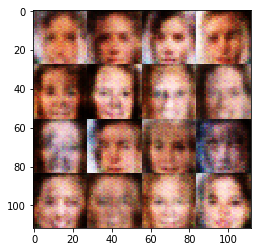

Epoch 1/1... Discriminator Loss: 1.5224... Generator Loss: 4.4828
Epoch 1/1... Discriminator Loss: 0.8771... Generator Loss: 1.1421
Epoch 1/1... Discriminator Loss: 1.1487... Generator Loss: 0.7576
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.5722
Epoch 1/1... Discriminator Loss: 1.7061... Generator Loss: 3.0548
Epoch 1/1... Discriminator Loss: 0.5488... Generator Loss: 2.3938
Epoch 1/1... Discriminator Loss: 0.4866... Generator Loss: 2.5589
Epoch 1/1... Discriminator Loss: 0.8553... Generator Loss: 2.3261
Epoch 1/1... Discriminator Loss: 1.7991... Generator Loss: 0.3607
Epoch 1/1... Discriminator Loss: 2.0299... Generator Loss: 4.1345


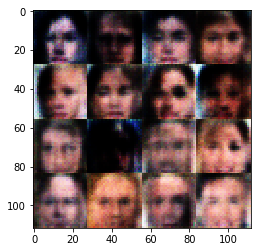

Epoch 1/1... Discriminator Loss: 0.8547... Generator Loss: 4.1904
Epoch 1/1... Discriminator Loss: 0.6605... Generator Loss: 2.3968
Epoch 1/1... Discriminator Loss: 0.9506... Generator Loss: 1.2695
Epoch 1/1... Discriminator Loss: 1.9648... Generator Loss: 0.2626
Epoch 1/1... Discriminator Loss: 0.9441... Generator Loss: 2.3555
Epoch 1/1... Discriminator Loss: 0.5974... Generator Loss: 2.1050
Epoch 1/1... Discriminator Loss: 0.4175... Generator Loss: 3.9358
Epoch 1/1... Discriminator Loss: 2.0003... Generator Loss: 0.2862
Epoch 1/1... Discriminator Loss: 0.5234... Generator Loss: 2.3336
Epoch 1/1... Discriminator Loss: 0.4031... Generator Loss: 6.5312


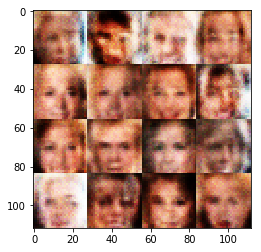

Epoch 1/1... Discriminator Loss: 0.7285... Generator Loss: 5.6358
Epoch 1/1... Discriminator Loss: 0.5971... Generator Loss: 2.2080
Epoch 1/1... Discriminator Loss: 0.7230... Generator Loss: 1.5379
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 0.4559... Generator Loss: 7.7508
Epoch 1/1... Discriminator Loss: 2.6139... Generator Loss: 0.1265
Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 0.5921
Epoch 1/1... Discriminator Loss: 1.0172... Generator Loss: 5.3959
Epoch 1/1... Discriminator Loss: 0.4703... Generator Loss: 3.3587
Epoch 1/1... Discriminator Loss: 0.8544... Generator Loss: 0.9816


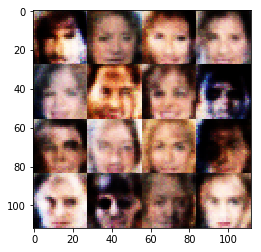

Epoch 1/1... Discriminator Loss: 0.9337... Generator Loss: 5.9186
Epoch 1/1... Discriminator Loss: 0.5095... Generator Loss: 4.0064
Epoch 1/1... Discriminator Loss: 0.5570... Generator Loss: 2.3076
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 5.2568
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 0.5168... Generator Loss: 3.1211
Epoch 1/1... Discriminator Loss: 0.7378... Generator Loss: 2.7506
Epoch 1/1... Discriminator Loss: 0.4496... Generator Loss: 5.9295
Epoch 1/1... Discriminator Loss: 0.4362... Generator Loss: 2.6283
Epoch 1/1... Discriminator Loss: 1.0535... Generator Loss: 6.6888


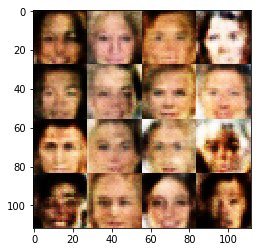

Epoch 1/1... Discriminator Loss: 0.4018... Generator Loss: 3.6998
Epoch 1/1... Discriminator Loss: 0.4988... Generator Loss: 3.6221
Epoch 1/1... Discriminator Loss: 0.7742... Generator Loss: 3.5751
Epoch 1/1... Discriminator Loss: 0.3822... Generator Loss: 5.9118
Epoch 1/1... Discriminator Loss: 0.5423... Generator Loss: 2.0740
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 1.2079
Epoch 1/1... Discriminator Loss: 0.5757... Generator Loss: 2.0368
Epoch 1/1... Discriminator Loss: 0.8636... Generator Loss: 1.0244
Epoch 1/1... Discriminator Loss: 0.4686... Generator Loss: 3.5074
Epoch 1/1... Discriminator Loss: 0.5955... Generator Loss: 2.0405


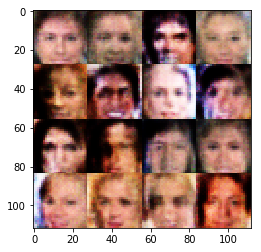

Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.0726
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.5179
Epoch 1/1... Discriminator Loss: 1.5338... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 0.5192... Generator Loss: 2.2462
Epoch 1/1... Discriminator Loss: 0.6033... Generator Loss: 1.6363
Epoch 1/1... Discriminator Loss: 0.5872... Generator Loss: 2.2167
Epoch 1/1... Discriminator Loss: 0.4657... Generator Loss: 2.3745
Epoch 1/1... Discriminator Loss: 0.4924... Generator Loss: 2.2660
Epoch 1/1... Discriminator Loss: 1.0510... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 0.5389... Generator Loss: 2.0420


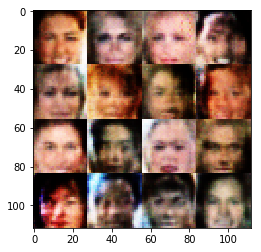

Epoch 1/1... Discriminator Loss: 0.5638... Generator Loss: 2.0451
Epoch 1/1... Discriminator Loss: 1.9926... Generator Loss: 0.2739
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 1.4610
Epoch 1/1... Discriminator Loss: 0.5416... Generator Loss: 2.5551
Epoch 1/1... Discriminator Loss: 1.1582... Generator Loss: 0.6970
Epoch 1/1... Discriminator Loss: 0.5491... Generator Loss: 2.0936
Epoch 1/1... Discriminator Loss: 0.6831... Generator Loss: 2.9560
Epoch 1/1... Discriminator Loss: 0.6874... Generator Loss: 1.3981
Epoch 1/1... Discriminator Loss: 0.4956... Generator Loss: 2.5670
Epoch 1/1... Discriminator Loss: 1.1544... Generator Loss: 0.7157


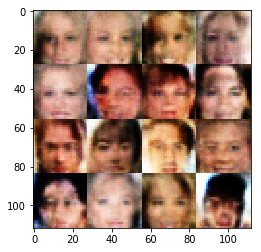

Epoch 1/1... Discriminator Loss: 1.4628... Generator Loss: 5.4978
Epoch 1/1... Discriminator Loss: 1.4881... Generator Loss: 0.9514
Epoch 1/1... Discriminator Loss: 0.5203... Generator Loss: 2.4138
Epoch 1/1... Discriminator Loss: 0.5731... Generator Loss: 1.8330
Epoch 1/1... Discriminator Loss: 0.6209... Generator Loss: 1.6598
Epoch 1/1... Discriminator Loss: 0.9489... Generator Loss: 0.9148
Epoch 1/1... Discriminator Loss: 0.7170... Generator Loss: 3.2663
Epoch 1/1... Discriminator Loss: 0.6049... Generator Loss: 4.1474
Epoch 1/1... Discriminator Loss: 0.4610... Generator Loss: 3.6058
Epoch 1/1... Discriminator Loss: 0.4415... Generator Loss: 2.9747


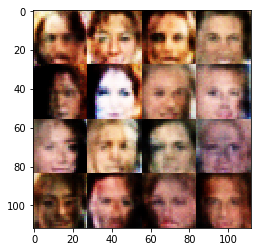

Epoch 1/1... Discriminator Loss: 1.0341... Generator Loss: 0.7856
Epoch 1/1... Discriminator Loss: 0.6122... Generator Loss: 1.5678
Epoch 1/1... Discriminator Loss: 0.7119... Generator Loss: 4.3367
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 1.5510
Epoch 1/1... Discriminator Loss: 0.6475... Generator Loss: 1.5383
Epoch 1/1... Discriminator Loss: 0.4582... Generator Loss: 2.7410
Epoch 1/1... Discriminator Loss: 0.7062... Generator Loss: 2.9386
Epoch 1/1... Discriminator Loss: 0.3899... Generator Loss: 3.4050
Epoch 1/1... Discriminator Loss: 2.4728... Generator Loss: 0.1399
Epoch 1/1... Discriminator Loss: 0.5791... Generator Loss: 3.3799


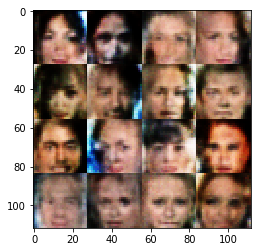

Epoch 1/1... Discriminator Loss: 0.5089... Generator Loss: 2.8988
Epoch 1/1... Discriminator Loss: 0.4701... Generator Loss: 2.7329
Epoch 1/1... Discriminator Loss: 0.7350... Generator Loss: 1.3792
Epoch 1/1... Discriminator Loss: 0.5673... Generator Loss: 2.7592
Epoch 1/1... Discriminator Loss: 0.5681... Generator Loss: 1.8811
Epoch 1/1... Discriminator Loss: 0.5727... Generator Loss: 2.2064
Epoch 1/1... Discriminator Loss: 0.5304... Generator Loss: 1.9438
Epoch 1/1... Discriminator Loss: 0.6063... Generator Loss: 3.1992
Epoch 1/1... Discriminator Loss: 0.4776... Generator Loss: 2.2873
Epoch 1/1... Discriminator Loss: 1.7217... Generator Loss: 4.8505


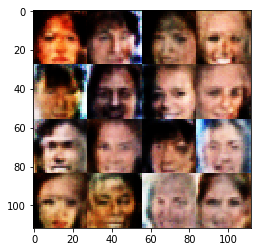

Epoch 1/1... Discriminator Loss: 0.9710... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 0.4858... Generator Loss: 3.6958
Epoch 1/1... Discriminator Loss: 1.1657... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 0.4992... Generator Loss: 4.0134
Epoch 1/1... Discriminator Loss: 0.5403... Generator Loss: 1.8762
Epoch 1/1... Discriminator Loss: 0.7621... Generator Loss: 1.2279
Epoch 1/1... Discriminator Loss: 1.8028... Generator Loss: 0.3158
Epoch 1/1... Discriminator Loss: 0.8126... Generator Loss: 1.5696
Epoch 1/1... Discriminator Loss: 0.5106... Generator Loss: 2.3063
Epoch 1/1... Discriminator Loss: 0.8250... Generator Loss: 3.6044


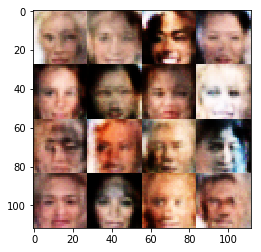

Epoch 1/1... Discriminator Loss: 1.7717... Generator Loss: 0.3295
Epoch 1/1... Discriminator Loss: 0.4508... Generator Loss: 2.7347
Epoch 1/1... Discriminator Loss: 0.4756... Generator Loss: 3.2122
Epoch 1/1... Discriminator Loss: 0.9127... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 0.8399... Generator Loss: 1.1651
Epoch 1/1... Discriminator Loss: 0.6000... Generator Loss: 1.9896
Epoch 1/1... Discriminator Loss: 0.6091... Generator Loss: 6.6031
Epoch 1/1... Discriminator Loss: 0.5933... Generator Loss: 1.6986
Epoch 1/1... Discriminator Loss: 0.7338... Generator Loss: 1.2199
Epoch 1/1... Discriminator Loss: 0.6021... Generator Loss: 1.7061


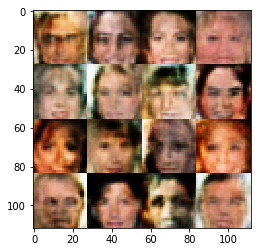

Epoch 1/1... Discriminator Loss: 0.5221... Generator Loss: 2.2044
Epoch 1/1... Discriminator Loss: 0.5353... Generator Loss: 1.8937
Epoch 1/1... Discriminator Loss: 0.6434... Generator Loss: 4.0787
Epoch 1/1... Discriminator Loss: 0.8951... Generator Loss: 0.9891
Epoch 1/1... Discriminator Loss: 0.4217... Generator Loss: 3.2675
Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 4.0118
Epoch 1/1... Discriminator Loss: 0.8228... Generator Loss: 1.1000
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 0.6949... Generator Loss: 1.6692
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 0.6704


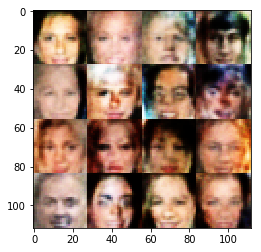

Epoch 1/1... Discriminator Loss: 0.4078... Generator Loss: 4.9343
Epoch 1/1... Discriminator Loss: 0.8702... Generator Loss: 5.8907
Epoch 1/1... Discriminator Loss: 0.7607... Generator Loss: 1.2551
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 4.3853
Epoch 1/1... Discriminator Loss: 0.5946... Generator Loss: 1.6641
Epoch 1/1... Discriminator Loss: 0.6999... Generator Loss: 1.3166
Epoch 1/1... Discriminator Loss: 0.4507... Generator Loss: 2.8979
Epoch 1/1... Discriminator Loss: 0.5503... Generator Loss: 4.1745
Epoch 1/1... Discriminator Loss: 0.9504... Generator Loss: 4.0296
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.5627


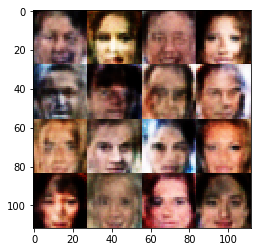

Epoch 1/1... Discriminator Loss: 0.7027... Generator Loss: 3.5941
Epoch 1/1... Discriminator Loss: 0.4592... Generator Loss: 2.5693
Epoch 1/1... Discriminator Loss: 0.6754... Generator Loss: 4.8759
Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 0.5882... Generator Loss: 4.0258
Epoch 1/1... Discriminator Loss: 0.6556... Generator Loss: 4.8787
Epoch 1/1... Discriminator Loss: 0.4615... Generator Loss: 4.4667
Epoch 1/1... Discriminator Loss: 0.7871... Generator Loss: 3.1677
Epoch 1/1... Discriminator Loss: 0.4346... Generator Loss: 3.7593
Epoch 1/1... Discriminator Loss: 0.5080... Generator Loss: 2.0165


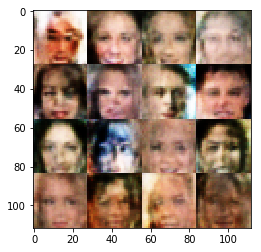

Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 5.6617
Epoch 1/1... Discriminator Loss: 0.5508... Generator Loss: 2.2616
Epoch 1/1... Discriminator Loss: 0.4449... Generator Loss: 2.7215
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 0.7473
Epoch 1/1... Discriminator Loss: 0.3571... Generator Loss: 5.6646
Epoch 1/1... Discriminator Loss: 0.3969... Generator Loss: 3.7466
Epoch 1/1... Discriminator Loss: 0.5987... Generator Loss: 1.6875
Epoch 1/1... Discriminator Loss: 0.4705... Generator Loss: 3.6556
Epoch 1/1... Discriminator Loss: 0.5541... Generator Loss: 1.9849
Epoch 1/1... Discriminator Loss: 0.6613... Generator Loss: 1.5699


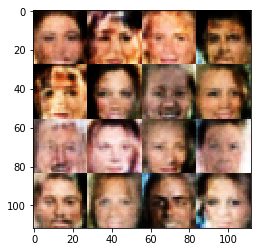

Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 2.3900
Epoch 1/1... Discriminator Loss: 0.4044... Generator Loss: 3.9549
Epoch 1/1... Discriminator Loss: 0.4732... Generator Loss: 2.5036
Epoch 1/1... Discriminator Loss: 1.0790... Generator Loss: 4.7972
Epoch 1/1... Discriminator Loss: 0.4373... Generator Loss: 3.8978
Epoch 1/1... Discriminator Loss: 0.4628... Generator Loss: 3.6407
Epoch 1/1... Discriminator Loss: 0.4553... Generator Loss: 4.1314
Epoch 1/1... Discriminator Loss: 0.3896... Generator Loss: 3.9376
Epoch 1/1... Discriminator Loss: 0.4212... Generator Loss: 6.1241
Epoch 1/1... Discriminator Loss: 0.4763... Generator Loss: 3.2267


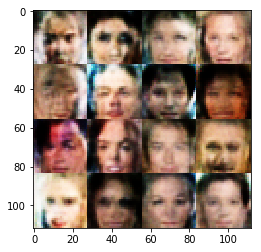

Epoch 1/1... Discriminator Loss: 0.4428... Generator Loss: 4.6603
Epoch 1/1... Discriminator Loss: 0.5033... Generator Loss: 2.1448
Epoch 1/1... Discriminator Loss: 0.4198... Generator Loss: 4.7942
Epoch 1/1... Discriminator Loss: 0.5258... Generator Loss: 3.4759
Epoch 1/1... Discriminator Loss: 0.4010... Generator Loss: 3.1017
Epoch 1/1... Discriminator Loss: 1.1866... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 0.9629... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 0.5277... Generator Loss: 3.5818
Epoch 1/1... Discriminator Loss: 1.0614... Generator Loss: 0.8151
Epoch 1/1... Discriminator Loss: 0.4824... Generator Loss: 3.9082


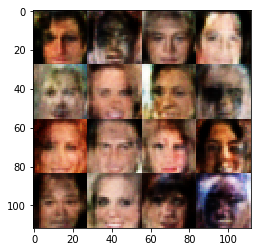

Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 0.8616... Generator Loss: 1.0202
Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 3.2265
Epoch 1/1... Discriminator Loss: 0.9649... Generator Loss: 5.2304
Epoch 1/1... Discriminator Loss: 1.1106... Generator Loss: 3.9887
Epoch 1/1... Discriminator Loss: 0.6534... Generator Loss: 1.7524
Epoch 1/1... Discriminator Loss: 0.4883... Generator Loss: 2.9772
Epoch 1/1... Discriminator Loss: 0.4065... Generator Loss: 3.7698
Epoch 1/1... Discriminator Loss: 0.4390... Generator Loss: 2.6311


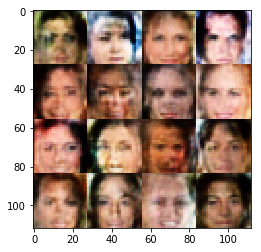

Epoch 1/1... Discriminator Loss: 0.4019... Generator Loss: 4.7156
Epoch 1/1... Discriminator Loss: 0.5300... Generator Loss: 2.2031
Epoch 1/1... Discriminator Loss: 0.8929... Generator Loss: 1.0159
Epoch 1/1... Discriminator Loss: 0.4055... Generator Loss: 3.2233
Epoch 1/1... Discriminator Loss: 0.9110... Generator Loss: 3.8644
Epoch 1/1... Discriminator Loss: 0.8970... Generator Loss: 0.9813
Epoch 1/1... Discriminator Loss: 1.0542... Generator Loss: 3.1248
Epoch 1/1... Discriminator Loss: 0.9382... Generator Loss: 3.4250
Epoch 1/1... Discriminator Loss: 2.4347... Generator Loss: 3.6756
Epoch 1/1... Discriminator Loss: 0.4330... Generator Loss: 2.9030


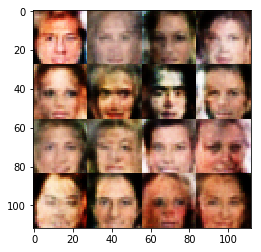

Epoch 1/1... Discriminator Loss: 0.6561... Generator Loss: 1.4504
Epoch 1/1... Discriminator Loss: 0.4031... Generator Loss: 3.3779
Epoch 1/1... Discriminator Loss: 0.4826... Generator Loss: 3.6182
Epoch 1/1... Discriminator Loss: 0.6170... Generator Loss: 1.8029
Epoch 1/1... Discriminator Loss: 0.7791... Generator Loss: 1.3574
Epoch 1/1... Discriminator Loss: 0.4080... Generator Loss: 3.1331
Epoch 1/1... Discriminator Loss: 0.7861... Generator Loss: 4.4178
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 1.2632
Epoch 1/1... Discriminator Loss: 0.4109... Generator Loss: 5.0369
Epoch 1/1... Discriminator Loss: 0.5217... Generator Loss: 4.1279


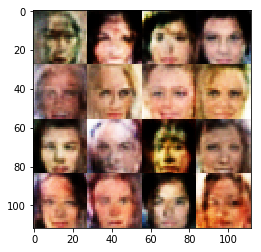

Epoch 1/1... Discriminator Loss: 0.4784... Generator Loss: 2.9127
Epoch 1/1... Discriminator Loss: 0.6985... Generator Loss: 3.5170
Epoch 1/1... Discriminator Loss: 0.5527... Generator Loss: 3.6816
Epoch 1/1... Discriminator Loss: 1.2137... Generator Loss: 1.8755
Epoch 1/1... Discriminator Loss: 1.0932... Generator Loss: 4.9479
Epoch 1/1... Discriminator Loss: 0.5500... Generator Loss: 4.5708
Epoch 1/1... Discriminator Loss: 0.4464... Generator Loss: 3.4292
Epoch 1/1... Discriminator Loss: 0.6218... Generator Loss: 3.8900
Epoch 1/1... Discriminator Loss: 0.4032... Generator Loss: 3.1240
Epoch 1/1... Discriminator Loss: 0.7000... Generator Loss: 1.3768


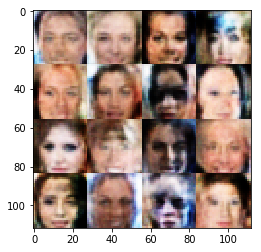

Epoch 1/1... Discriminator Loss: 0.5407... Generator Loss: 1.9605
Epoch 1/1... Discriminator Loss: 0.3585... Generator Loss: 4.6839
Epoch 1/1... Discriminator Loss: 0.7916... Generator Loss: 4.3931
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 3.3827
Epoch 1/1... Discriminator Loss: 0.8992... Generator Loss: 1.0363
Epoch 1/1... Discriminator Loss: 0.3959... Generator Loss: 3.4453
Epoch 1/1... Discriminator Loss: 0.3932... Generator Loss: 4.5708
Epoch 1/1... Discriminator Loss: 0.3810... Generator Loss: 3.8272
Epoch 1/1... Discriminator Loss: 0.7942... Generator Loss: 2.2191
Epoch 1/1... Discriminator Loss: 0.8321... Generator Loss: 3.2954


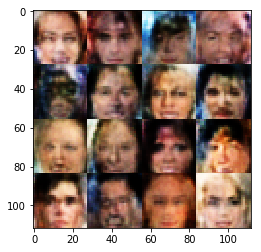

Epoch 1/1... Discriminator Loss: 0.6228... Generator Loss: 1.8629
Epoch 1/1... Discriminator Loss: 0.5600... Generator Loss: 1.8968
Epoch 1/1... Discriminator Loss: 0.5773... Generator Loss: 1.8759
Epoch 1/1... Discriminator Loss: 0.6906... Generator Loss: 1.4168
Epoch 1/1... Discriminator Loss: 1.8800... Generator Loss: 0.2901
Epoch 1/1... Discriminator Loss: 0.4024... Generator Loss: 3.3679
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 3.9451
Epoch 1/1... Discriminator Loss: 0.5369... Generator Loss: 2.2174
Epoch 1/1... Discriminator Loss: 0.3605... Generator Loss: 5.4244
Epoch 1/1... Discriminator Loss: 0.3453... Generator Loss: 10.5047


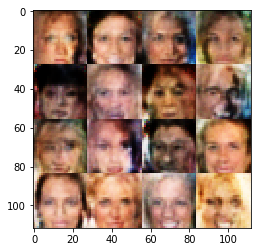

Epoch 1/1... Discriminator Loss: 0.6512... Generator Loss: 1.6070
Epoch 1/1... Discriminator Loss: 0.6801... Generator Loss: 1.6084
Epoch 1/1... Discriminator Loss: 0.4654... Generator Loss: 3.2343
Epoch 1/1... Discriminator Loss: 0.4472... Generator Loss: 2.6030
Epoch 1/1... Discriminator Loss: 0.6889... Generator Loss: 2.2830
Epoch 1/1... Discriminator Loss: 0.4543... Generator Loss: 5.6317
Epoch 1/1... Discriminator Loss: 0.5411... Generator Loss: 4.6621
Epoch 1/1... Discriminator Loss: 0.3552... Generator Loss: 5.9454
Epoch 1/1... Discriminator Loss: 0.4628... Generator Loss: 4.2714
Epoch 1/1... Discriminator Loss: 1.1433... Generator Loss: 0.7105


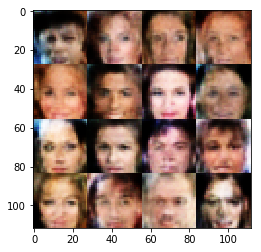

Epoch 1/1... Discriminator Loss: 0.5021... Generator Loss: 3.0175
Epoch 1/1... Discriminator Loss: 0.3590... Generator Loss: 5.1674
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.5789
Epoch 1/1... Discriminator Loss: 0.5073... Generator Loss: 2.6082
Epoch 1/1... Discriminator Loss: 0.4453... Generator Loss: 3.0322
Epoch 1/1... Discriminator Loss: 0.4489... Generator Loss: 3.0127
Epoch 1/1... Discriminator Loss: 0.9120... Generator Loss: 1.7349
Epoch 1/1... Discriminator Loss: 0.5219... Generator Loss: 2.1126
Epoch 1/1... Discriminator Loss: 0.3689... Generator Loss: 4.2086
Epoch 1/1... Discriminator Loss: 0.5847... Generator Loss: 2.8725


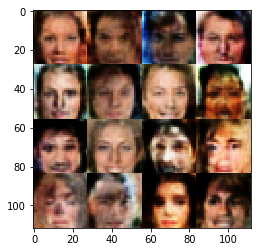

Epoch 1/1... Discriminator Loss: 0.4944... Generator Loss: 2.2226
Epoch 1/1... Discriminator Loss: 0.4543... Generator Loss: 2.6882
Epoch 1/1... Discriminator Loss: 0.3708... Generator Loss: 4.3216
Epoch 1/1... Discriminator Loss: 0.3577... Generator Loss: 5.0951
Epoch 1/1... Discriminator Loss: 0.7295... Generator Loss: 4.8577
Epoch 1/1... Discriminator Loss: 0.5154... Generator Loss: 2.2136
Epoch 1/1... Discriminator Loss: 0.4155... Generator Loss: 4.0519
Epoch 1/1... Discriminator Loss: 0.3824... Generator Loss: 5.3784
Epoch 1/1... Discriminator Loss: 0.6796... Generator Loss: 1.4702
Epoch 1/1... Discriminator Loss: 0.4425... Generator Loss: 2.9567


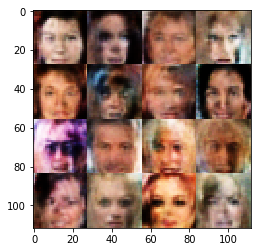

Epoch 1/1... Discriminator Loss: 0.4533... Generator Loss: 4.2872
Epoch 1/1... Discriminator Loss: 0.5219... Generator Loss: 4.1760
Epoch 1/1... Discriminator Loss: 0.5437... Generator Loss: 3.8065
Epoch 1/1... Discriminator Loss: 0.8760... Generator Loss: 1.0414
Epoch 1/1... Discriminator Loss: 0.4616... Generator Loss: 4.1392
Epoch 1/1... Discriminator Loss: 0.7427... Generator Loss: 2.6588


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.